In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [149]:
#import data and split it into feature and label
houseData = pd.read_csv('/Users/nishi/Downloads/Cali_housing/Housing.csv')

print(houseData.iloc[0:6,:].values)
X = houseData.iloc[:,:-1].values
y = houseData.iloc[:,9].values

from sklearn.impute import SimpleImputer 
missingValues = SimpleImputer(missing_values=np.nan, strategy='mean')

X[:,0:8] = missingValues.fit_transform(X[:,0:8])


[[-122.23 37.88 41 880 129.0 322 126 8.3252 'NEAR BAY' 452600]
 [-122.22 37.86 21 7099 1106.0 2401 1138 8.3014 'NEAR BAY' 358500]
 [-122.24 37.85 52 1467 190.0 496 177 7.2574 'NEAR BAY' 352100]
 [-122.25 37.85 52 1274 235.0 558 219 5.6431 'NEAR BAY' 341300]
 [-122.25 37.85 52 1627 280.0 565 259 3.8462 'NEAR BAY' 342200]
 [-122.25 37.85 52 919 213.0 413 193 4.0368 'NEAR BAY' 269700]]


In [125]:
#categorical data
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()

X[:,8] = X_labelencoder.fit_transform(X[:,8])

X_labelencoder.classes_

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X_ohe = ColumnTransformer([("California", OneHotEncoder(), [8])], remainder = 'passthrough')

X = X_ohe.fit_transform(X)

In [126]:
#split feature and label into training and testing data                               
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)     


In [137]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler(with_mean = False)
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)                          

In [132]:
#Linear Regression                              
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,y_train) 

LinearRegression()

In [138]:
#predict linear regression
LRpredict = linearRegressor.predict(X_test) 

In [139]:
#LR trainging score
linearRegressor.score(X_train,y_train)

-2173.1006237228867

In [140]:
#LR testing score
linearRegressor.score(X_test,y_test)

-434.7271096916297

In [141]:
#LR Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
LRrms = sqrt(mean_squared_error(y_test,LRpredict))

In [142]:
#Decision Tree Regression                              
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(random_state=4)
DTregressor.fit(X_train,y_train)                               



DecisionTreeRegressor(random_state=4)

In [143]:
DTpredict = DTregressor.predict(X_test)
#DT trainging score
DTregressor.score(X_train,y_train) 
#DT testing score
DTregressor.score(X_test,y_test)

-0.1857605537867073

In [144]:
#DT Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
DTrms = sqrt(mean_squared_error(y_test,DTpredict)) 

In [145]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=20,random_state=2)
RFregressor.fit(X_train,y_train)
                             
RFpredict = RFregressor.predict(X_test) 

In [146]:
#RF trainging score
RFregressor.score(X_train,y_train)
#RF testing score
RFregressor.score(X_test,y_test)

0.23149181056295942

In [147]:
#RF Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
RFrms = sqrt(mean_squared_error(y_test,RFpredict)) 
X = np.delete(X,[0,1,2,3,4,5,6,7,8,9,10,11],axis=1)  

/Users/nishi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: in the future the special handling of scalars will be removed from delete and raise an error
  """


In [148]:
#split feature and label into training and testing data                               
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/4,random_state=0)                                                    
X_train.shape

TypeError: Singleton array array(<20640x5938 sparse matrix of type '<class 'numpy.float64'>'
	with 185760 stored elements in Compressed Sparse Row format>,
      dtype=object) cannot be considered a valid collection.

In [ ]:
#Standardize training and test datasets.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)   

In [ ]:
#Linear Regresson
from sklearn.linear_model import LinearRegression
linearRegressor1 = LinearRegression()
linearRegressor1.fit(X_train,y_train) 

In [ ]:

linearRegressor1.predict(X_test) 
linearRegressor1.score(X_train,y_train)

#Visualizing regression result of training data
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,linearRegressor1.predict(X_train),color="red")
plt.title('Median House Price Prediction')
plt.xlabel('Median income')
plt.ylabel('House price')
plt.show()
#Visualizing regression result of testing data
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_train,linearRegressor1.predict(X_train),color="red")
plt.title('Median House Price Prediction')
plt.xlabel('Median income')
plt.ylabel('House price')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

#%matplotlib notebook
%matplotlib inline

In [12]:
housing = pd.read_csv('/Users/nishi/Downloads/housing.csv')
print("The number of rows and colums are {} and also called shape of the matrix".format(housing.shape))
print("Columns names are \n {}".format(housing.columns))
print(housing.dtypes)

The number of rows and colums are (20640, 10) and also called shape of the matrix
Columns names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


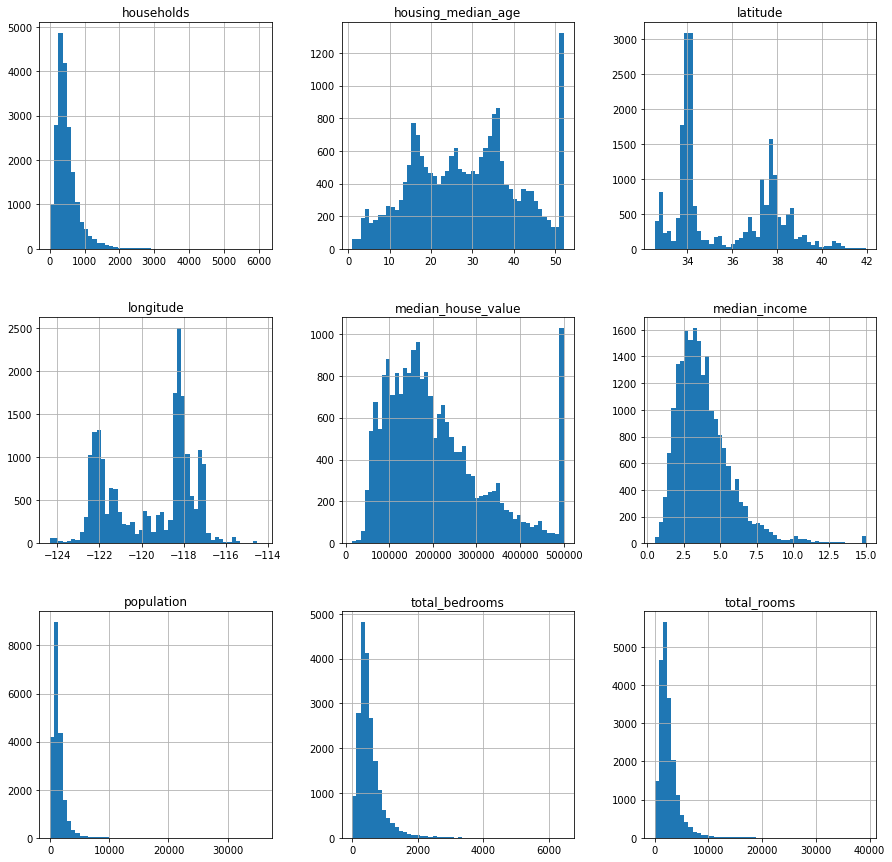

In [14]:
housing.hist(bins=50, figsize=(15,15))
plt.show()

In [15]:
housing["income_cat"] = np.ceil(housing["median_income"]/ 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
#remove the income category from our training and test data sets
strat_train_set.drop(["income_cat"], axis=1, inplace=True)
strat_test_set.drop(["income_cat"], axis=1, inplace=True)

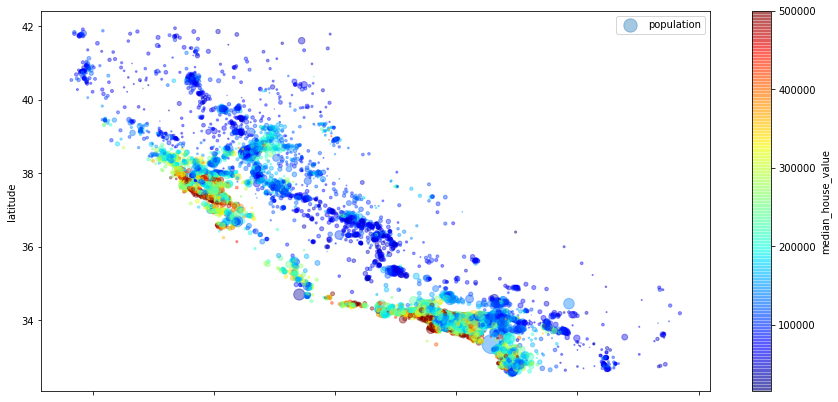

In [18]:
#visualize as scatterplot
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.legend()
#The radius of each circle represents the district’s population 
#The color represents the price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3b28d550>,
      dtype=object)

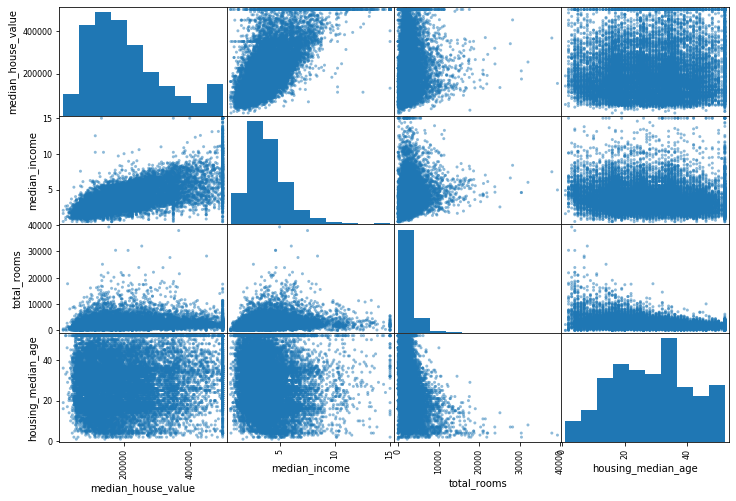

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
#correlation between our attributes using scatter_matrix method

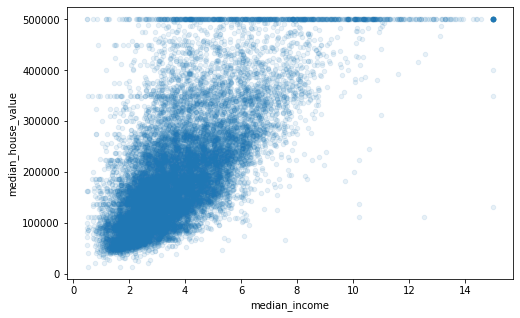

In [21]:
#correlation between median house value and the median house income

housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1, figsize=(8,5))

# this is a good correlation

In [22]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN


In [25]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
housing.head(3)
# caluclate price per household
# rooms per household
#population per household

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974


In [27]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# finding correlation of data set
# find which one is related to median house value

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [28]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [41]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(housing[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = housing[~housing[column].isin(data[column])]
    return outlierRemoved

In [33]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

In [34]:
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_attribs)),
                    ('imputer', SimpleImputer(strategy="median")),
                    ('attribs_adder', CombinedAttributesAdder()),
                    ('std_scaler', StandardScaler()),
                ])

In [35]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

In [36]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [37]:
housing_prepared = full_pipeline.fit_transform(housing)

In [39]:
hcorr = housing.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000


In [42]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(housing[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = housing[~housing[column].isin(data[column])]
    return outlierRemoved


In [43]:
#get the outlier
df_outliersRemoved = getOutliers(housing,"total_rooms")

(IQR = 1698.0)Outlier are anything outside this range: (-1104.0,5688.0)
Outliers out of total = 16512 are 
 1015


In [44]:
#check wheather there are any missing values or null
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [45]:
#statistics for missing values
print ("Total_bedrooms column Mode is  "+str(housing["total_bedrooms"].mode())+"\n")
print(housing["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    272.0
1    280.0
dtype: float64

count    16354.000000
mean       534.973890
std        412.699041
min          2.000000
25%        295.000000
50%        433.000000
75%        644.000000
max       6210.000000
Name: total_bedrooms, dtype: float64


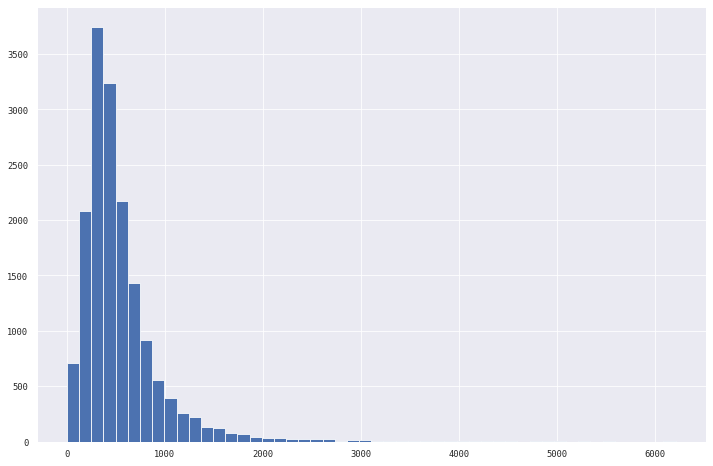

In [46]:
total_bedroms = housing[housing["total_bedrooms"].notnull()]["total_bedrooms"]#["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)

In [49]:
print(housing.iloc[:,4:5].head())
imputer = SimpleImputer(np.nan,strategy ="median")
imputer.fit(housing.iloc[:,4:5])
housing.iloc[:,4:5] = imputer.transform(housing.iloc[:,4:5])
housing.isnull().sum()

       total_bedrooms
17606           351.0
18632           108.0
14650           471.0
3230            371.0
3555           1525.0


/Users/nishi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass missing_values=nan as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [50]:
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
housing["ocean_proximity"].value_counts()
housing.describe()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589,1.169089
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950,1.420365
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,0.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775,0.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,1.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,4.000000


In [54]:
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
housing["ocean_proximity"].value_counts()
housing.describe()

0    7276
1    5263
4    2124
3    1847
2       2
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589,1.169089
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950,1.420365
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,0.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775,0.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,1.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,4.000000


In [56]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [57]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

13210 train + 3302 test


In [58]:
import hashlib
hash = hashlib.md5
hash(np.int64(4)).digest()[-1]

18

In [59]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [60]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [61]:
print(len(train_set), "train + ", len(test_set), "test")

13064 train +  3448 test


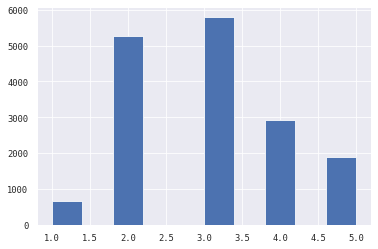

In [62]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()

In [64]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589,1.169089,3.006541
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950,1.420365,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,0.000000,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775,0.000000,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,1.000000,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475,1.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,4.000000,5.000000


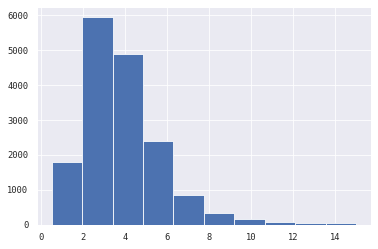

In [65]:
# median income looks like an imp feature

housing['median_income'].hist()

In [66]:
# dividing the income category to limit the number income category
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# putting everything above 5th category as 5th category
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace=True)

In [68]:
print(housing.iloc[0:6,:].values)
X = housing.iloc[:,:-1].values
y = housing.iloc[:,9].values

[[-1.2189e+02  3.7290e+01  3.8000e+01  1.5680e+03  3.5100e+02  7.1000e+02
   3.3900e+02  2.7042e+00  0.0000e+00  2.0000e+00]
 [-1.2193e+02  3.7050e+01  1.4000e+01  6.7900e+02  1.0800e+02  3.0600e+02
   1.1300e+02  6.4214e+00  0.0000e+00  5.0000e+00]
 [-1.1720e+02  3.2770e+01  3.1000e+01  1.9520e+03  4.7100e+02  9.3600e+02
   4.6200e+02  2.8621e+00  4.0000e+00  2.0000e+00]
 [-1.1961e+02  3.6310e+01  2.5000e+01  1.8470e+03  3.7100e+02  1.4600e+03
   3.5300e+02  1.8839e+00  1.0000e+00  2.0000e+00]
 [-1.1859e+02  3.4230e+01  1.7000e+01  6.5920e+03  1.5250e+03  4.4590e+03
   1.4630e+03  3.0347e+00  0.0000e+00  3.0000e+00]
 [-1.2097e+02  3.7660e+01  2.4000e+01  2.9300e+03  5.8800e+02  1.4480e+03
   5.7000e+02  3.5395e+00  1.0000e+00  3.0000e+00]]


In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)     


In [70]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [74]:
housing = strat_train_set.copy()

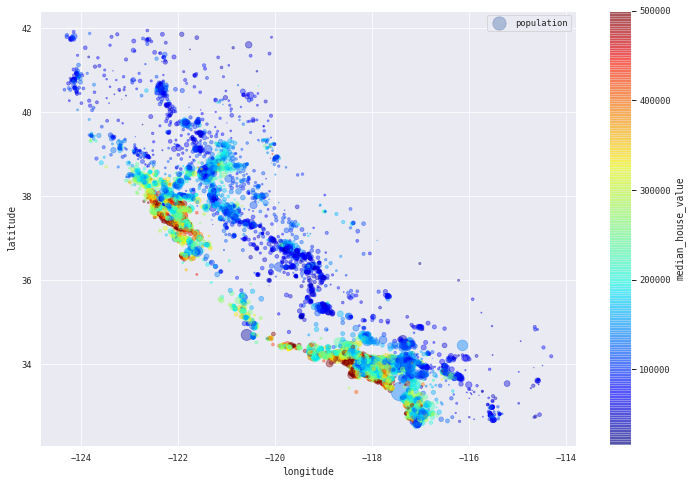

In [75]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

plt.legend()

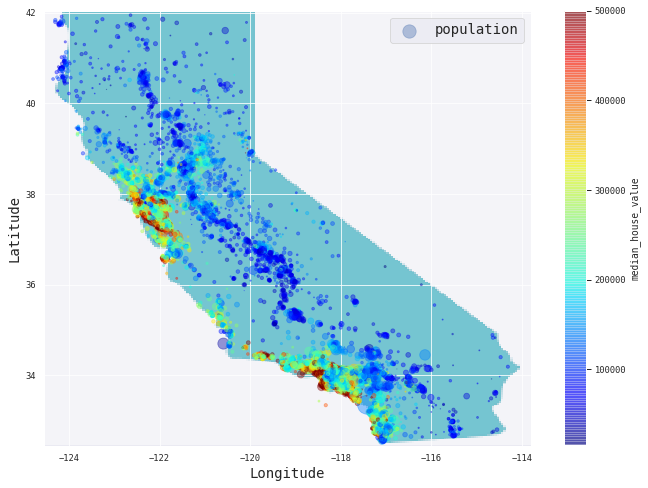

In [78]:
import matplotlib.image as mpimg

ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

# load the png image
california_img = mpimg.imread("/Users/nishi/Downloads/california.png")

plt.imshow(california_img, extent=[-124.55, -113.8, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

In [80]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [82]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [103]:
housing['median_house_value'].mean()

206990.9207243217

In [102]:
housing['median_house_value'].median()

179500.0

In [106]:
housing['median_house_value'].mode()

0    500001.0
dtype: float64

In [98]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [108]:
np.ptp(housing['median_house_value']) # the range

485002.0

In [110]:
np.std(housing['median_house_value'].median())

0.0

In [99]:
housing.head(1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,average housing
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,206990.920724
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,206990.920724
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,206990.920724
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,206990.920724
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,206990.920724
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND,206990.920724
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN,206990.920724
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND,206990.920724
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN,206990.920724
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,206990.920724
